## Research question

### Does the quality of family relationships, parents' cohabitation status have an impact on alcohol consumption?

selected columns::
[['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt



from sklearn import set_config
#set_config(transform_output = "pandas")

## Function to save figures

In [2]:
from pathlib import Path
IMAGES_PATH = Path() / "images/question 3"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')

In [4]:
X_train.columns

Index(['sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'higher_no', 'higher_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3',
       'alc'],
      dtype='object')

In [5]:
X_train.shape

(892, 45)

In [6]:
# Separate target from dataset
y_train = X_train['alc']
X_train = X_train.drop(columns = ['alc'])
##X_train = X_train[['famsize_GT3', 'Pstatus_A', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_yes', 'Medu', 'Fedu', 'famrel']] 
#[['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']] 
y_test = X_test['alc']
##X_test = X_test[['famsize_GT3', 'Pstatus_A', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_yes', 'Medu', 'Fedu', 'famrel']] 
X_test = X_test.drop(columns = 'alc')

In [7]:
X_train = X_train[['sex_M', 'famsize_GT3', 'Pstatus_A', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_yes', 'Medu', 'Fedu', 'famrel', 'schoolsup_yes','paid_yes','activities_yes', 'higher_yes', 'romantic_yes', 'studytime', 'failures', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3']] 
X_test = X_test[['sex_M', 'famsize_GT3', 'Pstatus_A', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_yes', 'Medu', 'Fedu', 'famrel', 'schoolsup_yes','paid_yes','activities_yes', 'higher_yes', 'romantic_yes', 'studytime', 'failures', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3']] 


In [8]:
X_train.shape

(892, 34)

## 0R classifier

In [9]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")



In [10]:
dummy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [11]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(y_train, dummy.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test, dummy.predict(X_test)))

Train Accuracy 0.5
Test Accuracy 0.6076555023923444


## Finding suitable value of k for KNN

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

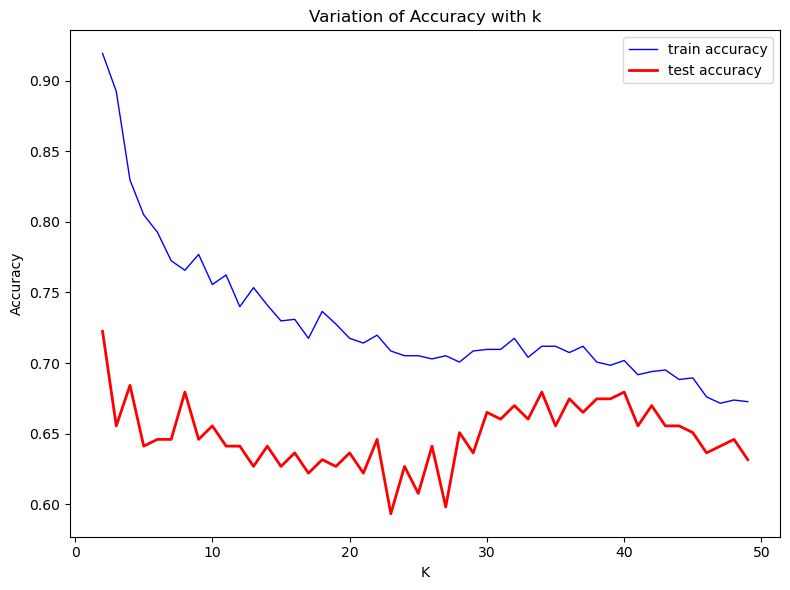

In [13]:
k = range(2, 50)
train_acc = []
test_acc = []
neighbors = []

for i in k:
    neighbors.append(i)
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize = (8,6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with k')
plt.plot(neighbors, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(neighbors, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against k')
plt.show();

In [14]:
pd.DataFrame({'K': neighbors, 'Train Acc': train_acc, 'Test Acc': test_acc})

K  Train Acc  Test Acc
0    2   0.919283  0.722488
1    3   0.892377  0.655502
2    4   0.829596  0.684211
3    5   0.804933  0.641148
4    6   0.792601  0.645933
5    7   0.772422  0.645933
6    8   0.765695  0.679426
7    9   0.776906  0.645933
8   10   0.755605  0.655502
9   11   0.762332  0.641148
10  12   0.739910  0.641148
11  13   0.753363  0.626794
12  14   0.741031  0.641148
13  15   0.729821  0.626794
14  16   0.730942  0.636364
15  17   0.717489  0.622010
16  18   0.736547  0.631579
17  19   0.727578  0.626794
18  20   0.717489  0.636364
19  21   0.714126  0.622010
20  22   0.719731  0.645933
21  23   0.708520  0.593301
22  24   0.705157  0.626794
23  25   0.705157  0.607656
24  26   0.702915  0.641148
25  27   0.705157  0.598086
26  28   0.700673  0.650718
27  29   0.708520  0.636364
28  30   0.709641  0.665072
29  31   0.709641  0.660287
30  32   0.717489  0.669856
31  33   0.704036  0.660287
32  34   0.711883  0.679426
33  35   0.711883  0.655502
34  36   0.707399  0.674641
35  37   0.711883  0.665072
36  38   0.700673  0.674641
37  39   0.698430  0.674641
38  40   0.701794  0.679426
39  41   0.691704  0.655502
40  42   0.693946  0.669856
41  43   0.695067  0.655502
42  44   0.688341  0.655502
43  45   0.689462  0.650718
44  46   0.676009  0.636364
45  47   0.671525  0.641148
46  48   0.673767  0.645933
47  49   0.672646  0.631579

## Applying suitable value of k in KNN Classifier

In [15]:
best_grid_knn= KNeighborsClassifier(n_neighbors=6)
best_grid_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[88 39]
 [35 47]]
Accuracy Score 0.645933014354067
Classification report:               precision    recall  f1-score   support

         0.0       0.72      0.69      0.70       127
         1.0       0.55      0.57      0.56        82

    accuracy                           0.65       209
   macro avg       0.63      0.63      0.63       209
weighted avg       0.65      0.65      0.65       209



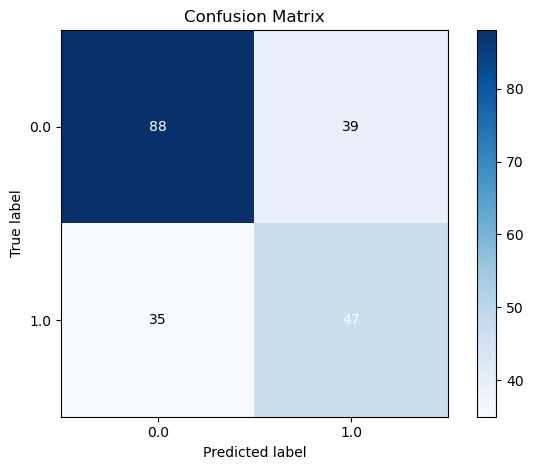

In [16]:
best_grid_knn.fit(X_train, y_train)
y_pred=best_grid_knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for KNN hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Classification Report for Train Set
Accuracy Score 0.7926008968609866
              precision    recall  f1-score   support

         0.0       0.76      0.86      0.81       446
         1.0       0.84      0.73      0.78       446

    accuracy                           0.79       892
   macro avg       0.80      0.79      0.79       892
weighted avg       0.80      0.79      0.79       892



/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

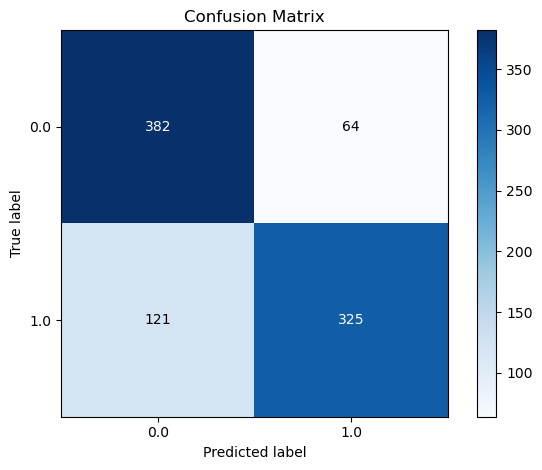

In [17]:
print("Classification Report for Train Set")
print("Accuracy Score {}".format(accuracy_score(y_train, best_grid_knn.predict(X_train).round (3))))
print(classification_report (y_train, best_grid_knn.predict(X_train)))
skplt.metrics.plot_confusion_matrix(y_train, best_grid_knn.predict(X_train));
save_fig('Train Set Confusion Matrix train for KNN hyper-para tuned q3')

## Hyperparameter Tuning on Decision Tree

In [18]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [19]:
param_grid = {
    'criterion' : ['gini'],
    'max_depth' : range(2,8),
}

In [20]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(2, 8)},
             verbose=2)

In [21]:
best_grid_dt = grid_search_dt.best_estimator_
best_grid_dt

DecisionTreeClassifier(max_depth=7)

## Appying best estimators on Decision Tree

[[91 36]
 [23 59]]
Accuracy Score 0.7177033492822966
Classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76       127
         1.0       0.62      0.72      0.67        82

    accuracy                           0.72       209
   macro avg       0.71      0.72      0.71       209
weighted avg       0.73      0.72      0.72       209



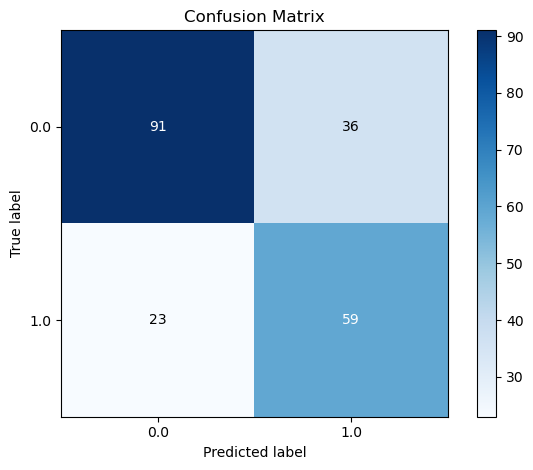

In [22]:
best_grid_dt.fit(X_train, y_train)
y_pred=best_grid_dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

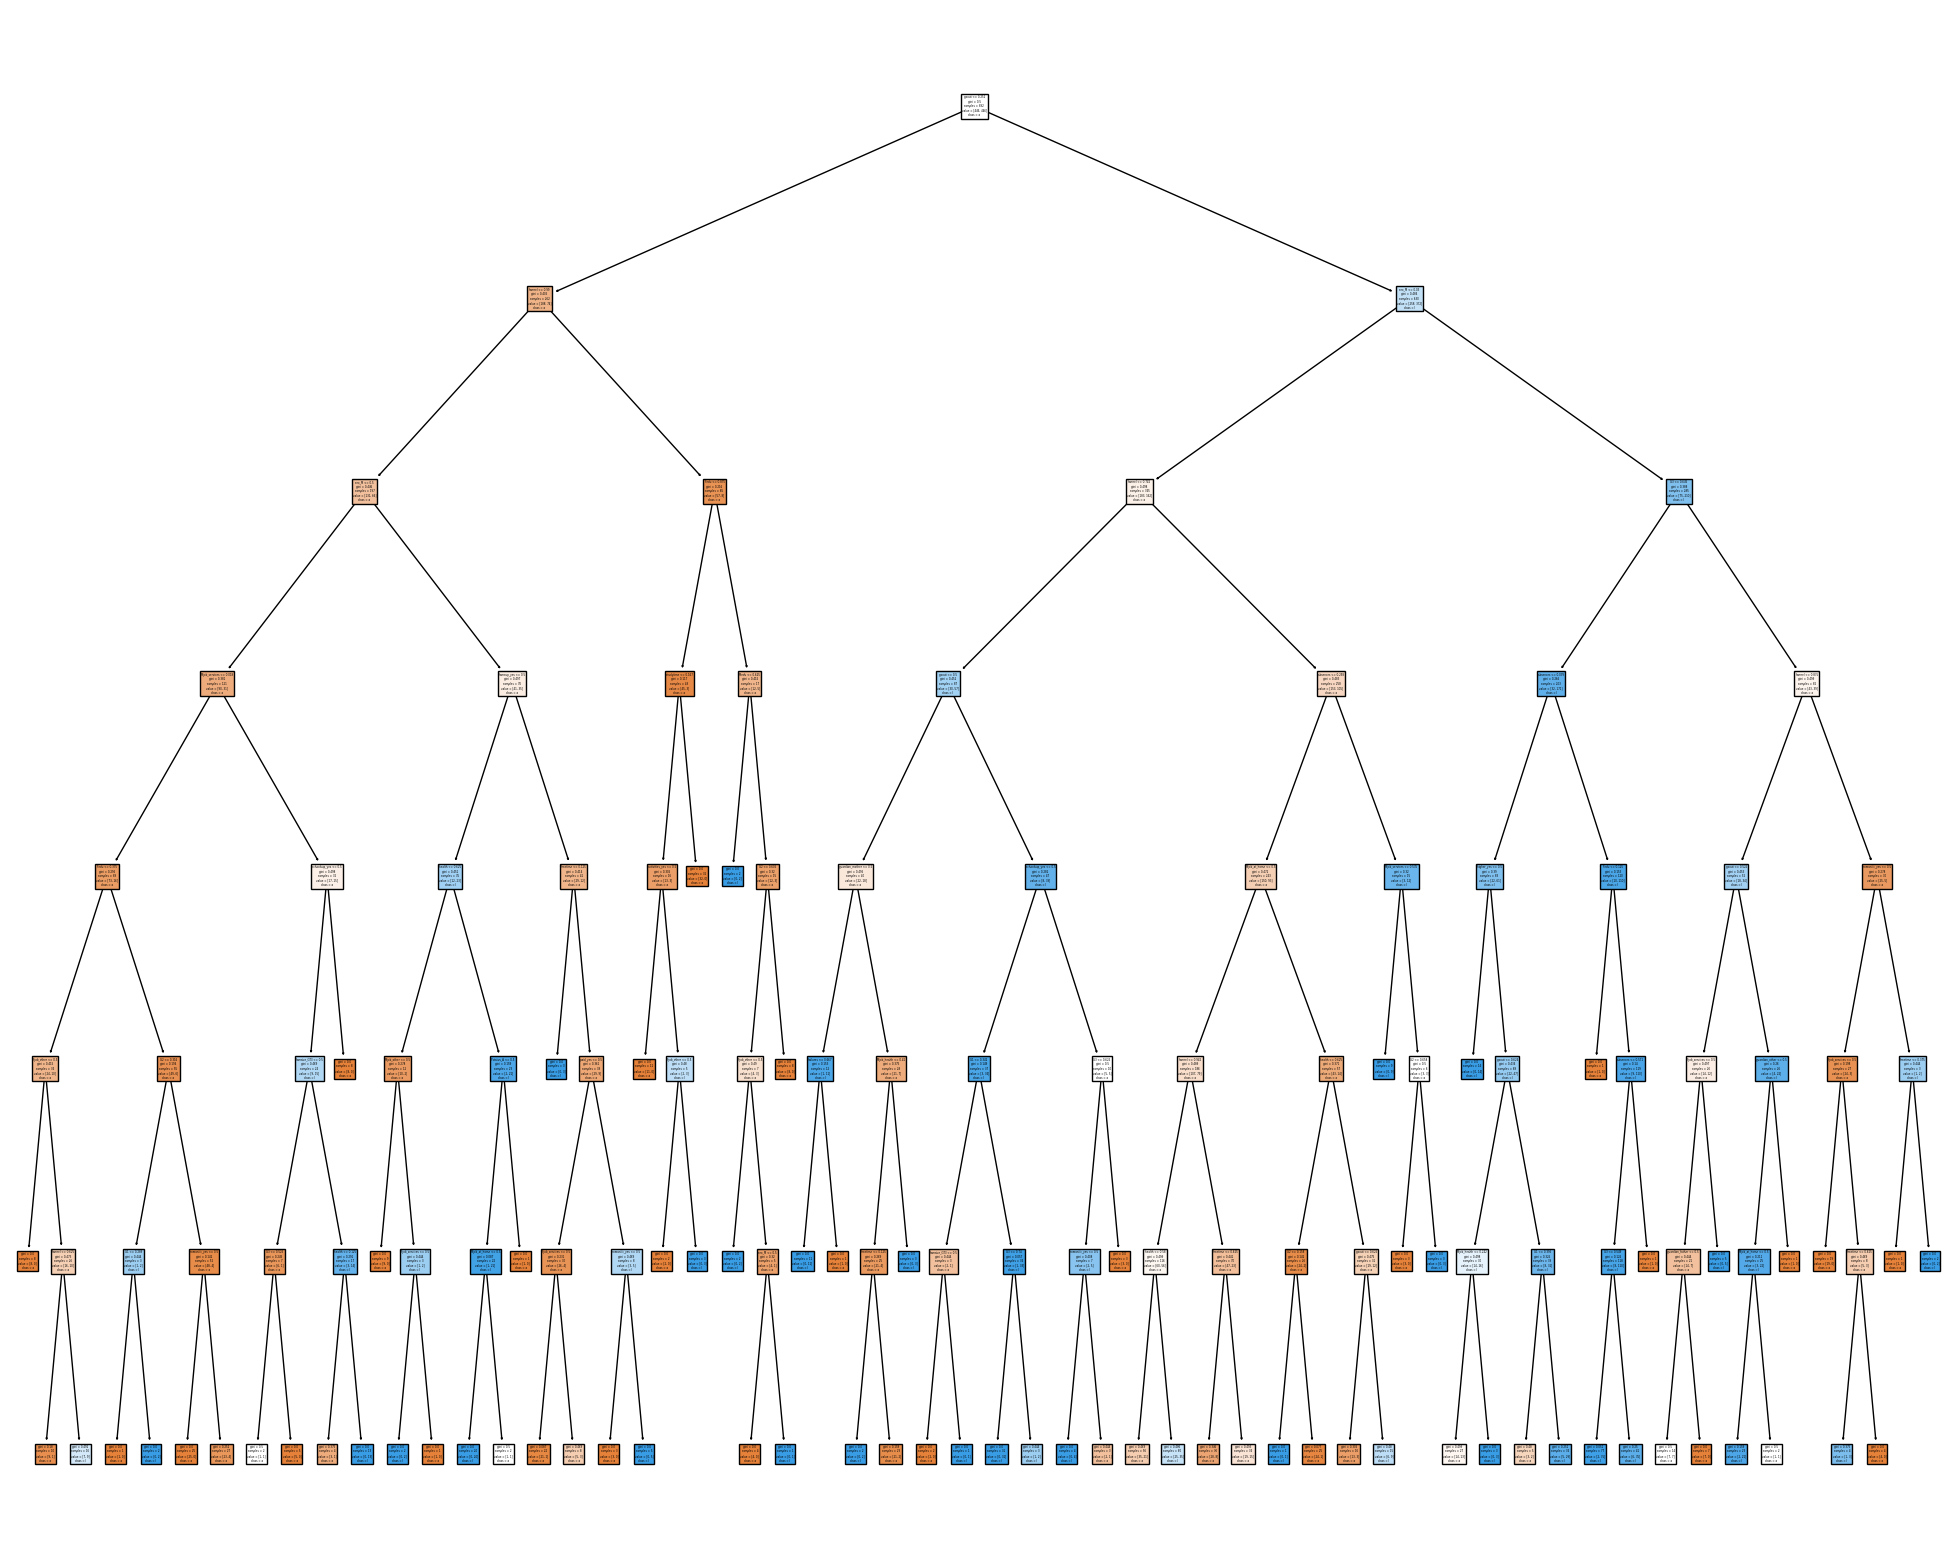

In [23]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_grid_dt, 
                   feature_names=X_train.columns.values.tolist(),  
                   class_names=y_train.name,
                   filled=True)

In [24]:
fig.savefig("decision_tree Q3.png")

Max Depth =  1 , Train Acc. =  0.628 , Test Acc. =  0.541
Max Depth =  2 , Train Acc. =  0.651 , Test Acc. =  0.703
Max Depth =  3 , Train Acc. =  0.686 , Test Acc. =  0.703
Max Depth =  4 , Train Acc. =  0.733 , Test Acc. =  0.718
Max Depth =  5 , Train Acc. =  0.769 , Test Acc. =  0.756
Max Depth =  6 , Train Acc. =  0.806 , Test Acc. =  0.722
Max Depth =  7 , Train Acc. =  0.842 , Test Acc. =  0.718
Max Depth =  8 , Train Acc. =  0.89 , Test Acc. =  0.756
Max Depth =  9 , Train Acc. =  0.932 , Test Acc. =  0.727
Max Depth =  10 , Train Acc. =  0.961 , Test Acc. =  0.742
Max Depth =  11 , Train Acc. =  0.981 , Test Acc. =  0.722
Max Depth =  12 , Train Acc. =  0.989 , Test Acc. =  0.751
Max Depth =  13 , Train Acc. =  0.996 , Test Acc. =  0.732
Max Depth =  14 , Train Acc. =  0.998 , Test Acc. =  0.751
Max Depth =  15 , Train Acc. =  0.999 , Test Acc. =  0.746
Max Depth =  16 , Train Acc. =  1.0 , Test Acc. =  0.77
Max Depth =  17 , Train Acc. =  1.0 , Test Acc. =  0.78
Max Depth =  

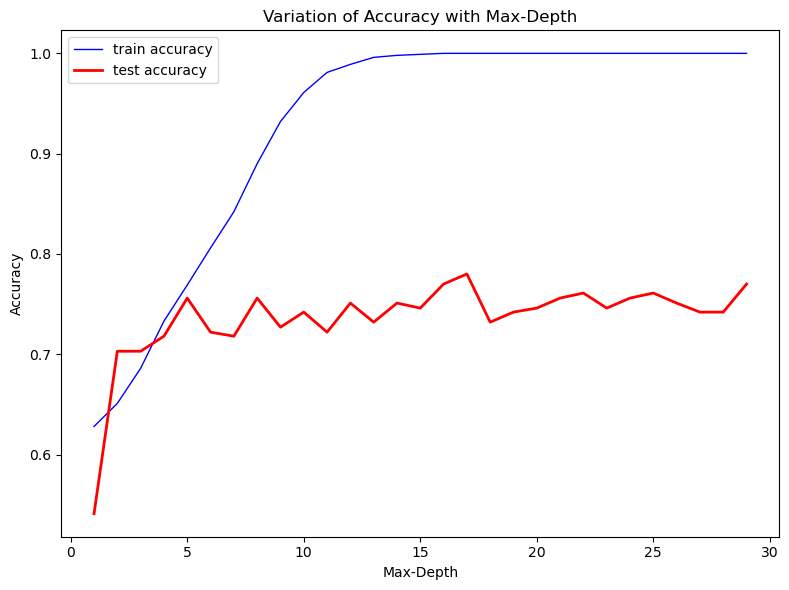

In [25]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

In [26]:
# Confusion matrix for train set
print("Confusion Matrix for Train Set")
pd. DataFrame (confusion_matrix(y_train, best_grid_dt.predict(X_train)))


Confusion Matrix for Train Set


0    1
0  391   55
1   86  360

In [27]:
# Confusion matrix for test set
print("Confusion Matrix for Test Set")
pd. DataFrame (confusion_matrix(y_test, best_grid_dt.predict(X_test)))

Confusion Matrix for Test Set


0   1
0  91  36
1  23  59

In [28]:
print("Classification Report for Train Set")
print(classification_report (y_train, best_grid_dt.predict(X_train).round (3)))

Classification Report for Train Set
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       446
         1.0       0.87      0.81      0.84       446

    accuracy                           0.84       892
   macro avg       0.84      0.84      0.84       892
weighted avg       0.84      0.84      0.84       892



In [29]:
print("Classification Report for Test Set")
print(classification_report(y_test, best_grid_dt.predict (X_test). round(3)))

Classification Report for Test Set
              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76       127
         1.0       0.62      0.72      0.67        82

    accuracy                           0.72       209
   macro avg       0.71      0.72      0.71       209
weighted avg       0.73      0.72      0.72       209



## Hyperparameter Tuning on Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [31]:
param_grid= {
    'n_estimators': [10, 50, 100, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(2,8),
    'max_features': [None, 'sqrt', 'log2']
}

param_grid= {
    'n_estimators': [10]
}

In [32]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=100; total time=  

[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=None, n_e

[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=50; total time=

[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=50; total 

[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ...................

[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=500; total time=   0.9s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=500; total time=   0.8s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=500; total time=   0.6s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=500; total time=   0.6s
[CV] END criterion=gini, max_depth=3, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=None, n_estimators=50; tota

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/job

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 8),
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 500]},
             verbose=2)

In [33]:
# Finding out the best estimator
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=None,
                       n_estimators=500)

## Applying best estimators in Random Forest

In [34]:
best_grid_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=None,
                       n_estimators=500)

### Train

[[424  22]
 [ 44 402]]
Accuracy Score 0.9260089686098655
Classification report: 
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       446
         1.0       0.95      0.90      0.92       446

    accuracy                           0.93       892
   macro avg       0.93      0.93      0.93       892
weighted avg       0.93      0.93      0.93       892



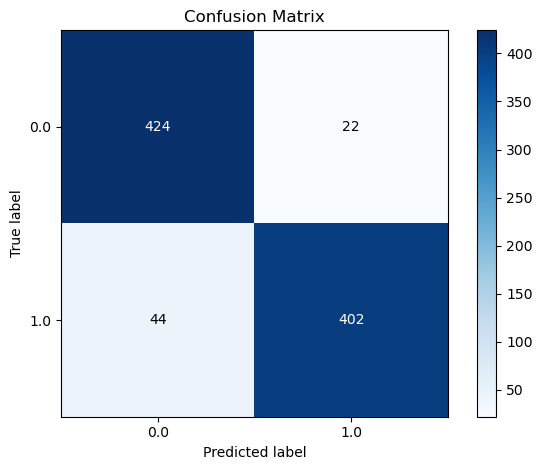

In [35]:
y_pred=best_grid_rf.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred, cmap='Blues');
save_fig('Train Set Confusion Matrix for Random Forest hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test

In [36]:
y_pred = best_grid_rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

[[106  21]
 [ 27  55]]
Accuracy Score 0.7703349282296651
Classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82       127
         1.0       0.72      0.67      0.70        82

    accuracy                           0.77       209
   macro avg       0.76      0.75      0.76       209
weighted avg       0.77      0.77      0.77       209



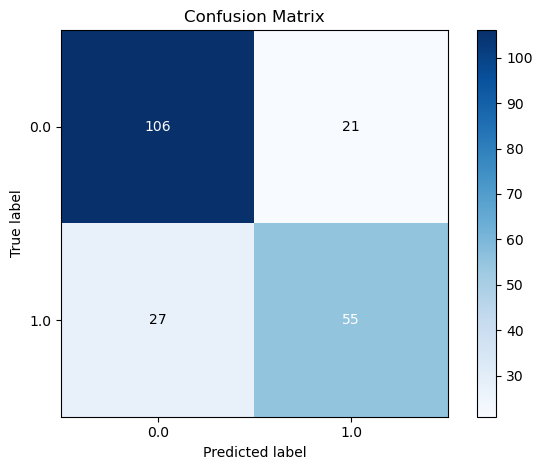

In [37]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Random forest hyper-para tuned q3')

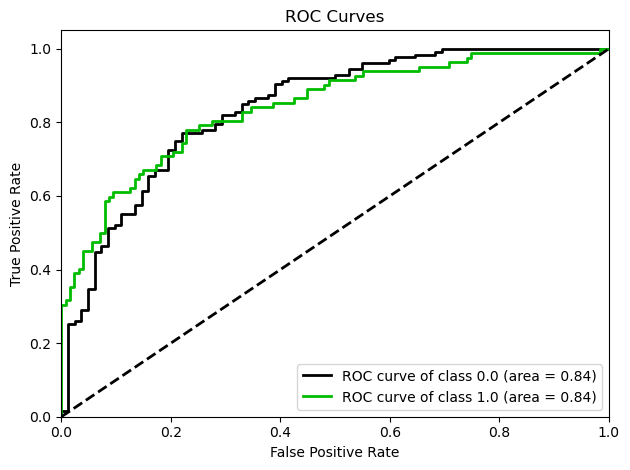

In [38]:
y_probas = best_grid_rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
save_fig('ROC Curve-Random Forest Q3')
plt.show();

## Hyperparameter Tuning on Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'random_state' : ['42', None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [41]:
lr_grid = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_lr.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_feat

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
410 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aymanibnehakim/opt/anaco

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': ['42', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=2)

In [42]:
best_grid_lr = grid_search_lr.best_estimator_
best_grid_lr

LogisticRegression(solver='liblinear')

In [43]:
# Applying the best grid for logistic regression
best_grid_lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

### Train Set

[[333 113]
 [135 311]]
Accuracy Score 0.7219730941704036
Classification report: 
              precision    recall  f1-score   support

         0.0       0.71      0.75      0.73       446
         1.0       0.73      0.70      0.71       446

    accuracy                           0.72       892
   macro avg       0.72      0.72      0.72       892
weighted avg       0.72      0.72      0.72       892



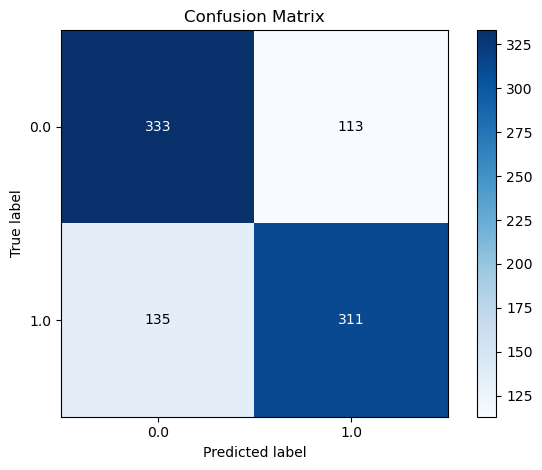

In [44]:
y_pred=best_grid_lr.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Logistic Regression hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[84 43]
 [23 59]]
Accuracy Score 0.6842105263157895
Classification report: 
              precision    recall  f1-score   support

         0.0       0.79      0.66      0.72       127
         1.0       0.58      0.72      0.64        82

    accuracy                           0.68       209
   macro avg       0.68      0.69      0.68       209
weighted avg       0.70      0.68      0.69       209



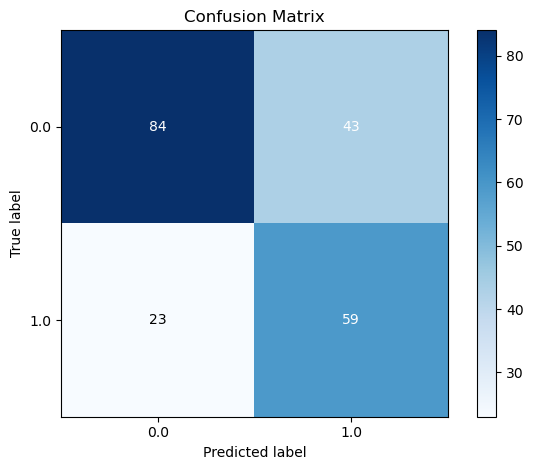

In [45]:
y_pred=best_grid_lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Logistic Regression hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on SVM

In [46]:
from sklearn.svm import SVC

In [47]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'random_state' : [42, None],
    'gamma' : ['scale', 'auto'],
    'shrinking' : [True, False],
    'probability' : [True, False],
    'break_ties' : [True, False]
}

In [48]:
svc_grid = SVC()
grid_search_svc = GridSearchCV(estimator=svc_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_svc.fit(X_train,y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500; total time=   0.9s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500; total time=   1.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=500; total time=   1.0s
[CV] END criterion=entropy, max_depth=7, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=None, n_estimators=50; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=None, n_estim

[CV] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=500; total time=   1.0s
[CV] END criterion=entropy, max_depth=7, max_features=None, n_estimators=10; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=None, n_estimators=10; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=None, n_estimators=50; total time=   0.3s
[CV] END criterion=entropy, max_depth=7, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=None, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, max_features=None, n_estimators=500; total time=   2.0s
[CV] END criterion=entropy, max_depth=7, max_features=None, n_estimators=500; total time=   1.9s
[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=500; total time=   1.0s
[CV] END criterion=entropy, max_depth=7, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=None, n_estimators=50; total time=   0.3s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=500; total time=   0.9s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=500; total time=   0.9s
[CV] END criterion=entropy, max_depth=6, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=6, max_features=None, n_estimators=500; total time=   1.8s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_d

[CV] END criterion=log_loss, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=2, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=3, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_depth=3, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss,

[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=500; total time=   1.0s
[CV] END criterion=log_loss, max_depth=2, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_d

[CV] END criterion=log_loss, max_depth=2, max_features=None, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=None, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=None, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=2, max_features=None, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=log_loss, max_depth=2, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=2, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=2, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=log_loss, max_depth=2, max_features=sqrt, n_estimators=500; total time=   0.2s
[CV] END criterion=l

[CV] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500; total time=   0.9s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500; total time=   1.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=500; total time=   0.9s
[CV] END criterion=log_loss, max_depth=2, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=log_loss, max_d

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'break_ties': [True, False],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True, False],
                         'random_state': [42, None],
                         'shrinking': [True, False]},
             verbose=2)

In [49]:
best_grid_svc = grid_search_svc.best_estimator_
best_grid_svc

SVC(break_ties=True, kernel='poly', probability=True, random_state=42)

In [50]:
# Applying the best grid for SVC
best_grid_svc.fit(X_train, y_train)

SVC(break_ties=True, kernel='poly', probability=True, random_state=42)

### Train Set

[[406  40]
 [ 63 383]]
Accuracy Score 0.8845291479820628
Classification report: 
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       446
         1.0       0.91      0.86      0.88       446

    accuracy                           0.88       892
   macro avg       0.89      0.88      0.88       892
weighted avg       0.89      0.88      0.88       892



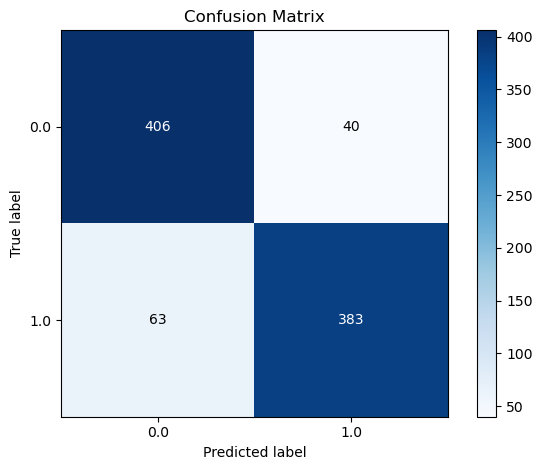

In [51]:
y_pred=best_grid_svc.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for SVM hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[96 31]
 [26 56]]
Accuracy Score 0.7272727272727273
Classification report: 
              precision    recall  f1-score   support

         0.0       0.79      0.76      0.77       127
         1.0       0.64      0.68      0.66        82

    accuracy                           0.73       209
   macro avg       0.72      0.72      0.72       209
weighted avg       0.73      0.73      0.73       209



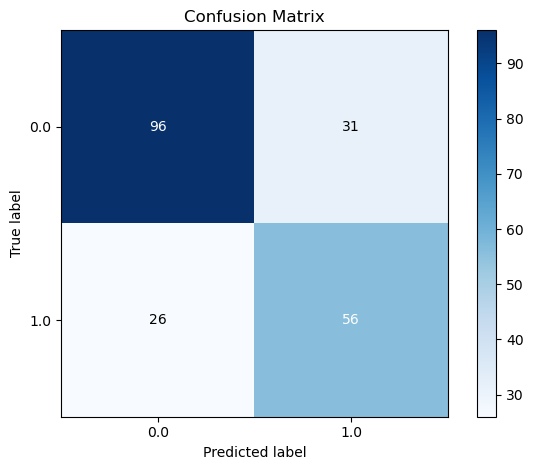

In [52]:

y_pred=best_grid_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for SVC hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on Multinomial Naive Bayes

In [53]:
from  sklearn.naive_bayes import MultinomialNB

In [54]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
    'fit_prior': [True, False]
}

In [55]:
nb_grid = MultinomialNB()
grid_search_nb = GridSearchCV(estimator=nb_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_nb.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'fit_prior': [True, False]},
             verbose=2)

In [56]:
best_grid_nb = grid_search_nb.best_estimator_
best_grid_nb

MultinomialNB(alpha=10.0)

In [57]:
# Applying the best grid for Multinomial Naive Bayes
best_grid_nb.fit(X_train, y_train)

MultinomialNB(alpha=10.0)

### Train Set

In [58]:
y_pred=best_grid_nb.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Multinomial NB hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

[[298 148]
 [157 289]]
Accuracy Score 0.6580717488789237
Classification report: 
              precision    recall  f1-score   support

         0.0       0.65      0.67      0.66       446
         1.0       0.66      0.65      0.65       446

    accuracy                           0.66       892
   macro avg       0.66      0.66      0.66       892
weighted avg       0.66      0.66      0.66       892



### Test Set

[[78 49]
 [27 55]]
Accuracy Score 0.6363636363636364
Classification report: 
              precision    recall  f1-score   support

         0.0       0.74      0.61      0.67       127
         1.0       0.53      0.67      0.59        82

    accuracy                           0.64       209
   macro avg       0.64      0.64      0.63       209
weighted avg       0.66      0.64      0.64       209



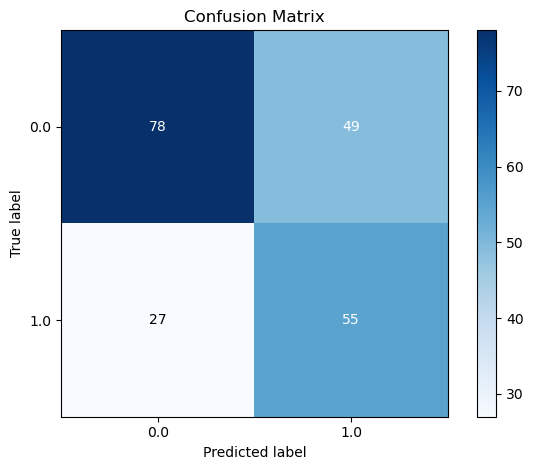

In [59]:
y_pred=best_grid_nb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for MultinomialNB hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Ensemble Learning

In [60]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Hard Voting classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [62]:
best_grid_rf

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=None,
                       n_estimators=500)

In [63]:
#log_clf = LogisticRegression(random_state=42)
#rnd_clf = RandomForestClassifier(random_state=42)
#svm_clf = SVC(random_state=42)
hard_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', DecisionTreeClassifier(max_depth=5)),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'hard'
)
hard_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=6)),
                             ('dt', DecisionTreeClassifier(max_depth=5)),
                             ('lr', LogisticRegression(solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=7,
                                                     max_features=None,
                                                     n_estimators=500)),
                             ('svc',
                              SVC(break_ties=True, kernel='poly',
                                  probability=True, random_state=42)),
                             ('nb', MultinomialNB(alpha=10.0))])

In [64]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, hard_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.645933014354067
DecisionTreeClassifier 0.7177033492822966
LogisticRegression 0.6842105263157895
RandomForestClassifier 0.7703349282296651
SVC 0.7272727272727273
MultinomialNB 0.6363636363636364
VotingClassifier 0.7559808612440191


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Train Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

Accuracy Score 0.8497757847533632
Classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       446
         1.0       0.93      0.76      0.83       446

    accuracy                           0.85       892
   macro avg       0.86      0.85      0.85       892
weighted avg       0.86      0.85      0.85       892



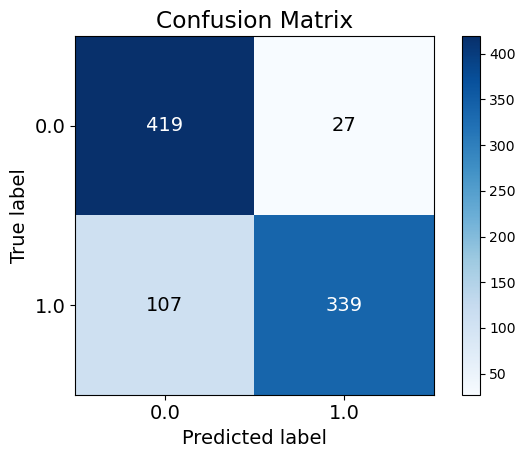

In [65]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Hard Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train))))

### Test Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Score 0.7559808612440191
Classification report: 
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       127
         1.0       0.72      0.61      0.66        82

    accuracy                           0.76       209
   macro avg       0.75      0.73      0.74       209
weighted avg       0.75      0.76      0.75       209



/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

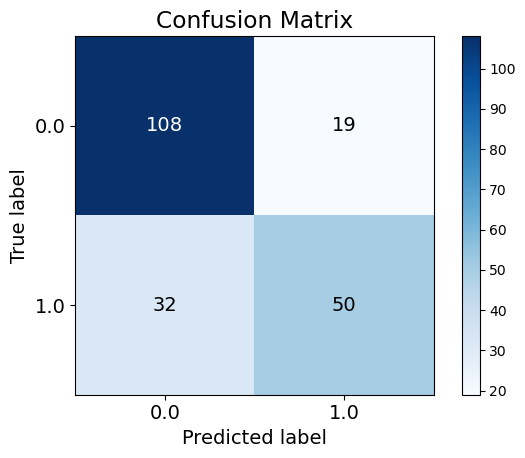

In [66]:
skplt.metrics.plot_confusion_matrix(y_test, hard_voting_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for Ensemble Hard Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_test, hard_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, hard_voting_clf.predict(X_test))))

## Soft voting classifier

In [67]:
soft_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', DecisionTreeClassifier(max_depth=5)),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'soft'
)
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=6)),
                             ('dt', DecisionTreeClassifier(max_depth=5)),
                             ('lr', LogisticRegression(solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=7,
                                                     max_features=None,
                                                     n_estimators=500)),
                             ('svc',
                              SVC(break_ties=True, kernel='poly',
                                  probability=True, random_state=42)),
                             ('nb', MultinomialNB(alpha=10.0))],
                 voting='soft')

In [68]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, soft_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.645933014354067
DecisionTreeClassifier 0.7129186602870813
LogisticRegression 0.6842105263157895
RandomForestClassifier 0.7655502392344498
SVC 0.7272727272727273
MultinomialNB 0.6363636363636364
VotingClassifier 0.7655502392344498


### Train Set

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimi

Accuracy Score 0.8497757847533632
Classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       446
         1.0       0.93      0.76      0.83       446

    accuracy                           0.85       892
   macro avg       0.86      0.85      0.85       892
weighted avg       0.86      0.85      0.85       892



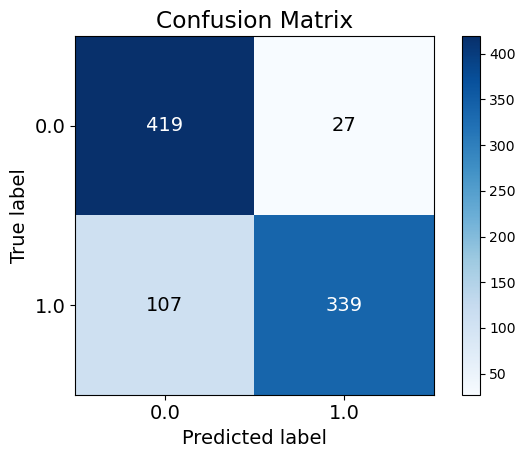

In [69]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Soft Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train))))

### Test Set

Accuracy Score 0.7655502392344498
Classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81       127
         1.0       0.71      0.67      0.69        82

    accuracy                           0.77       209
   macro avg       0.75      0.75      0.75       209
weighted avg       0.76      0.77      0.76       209



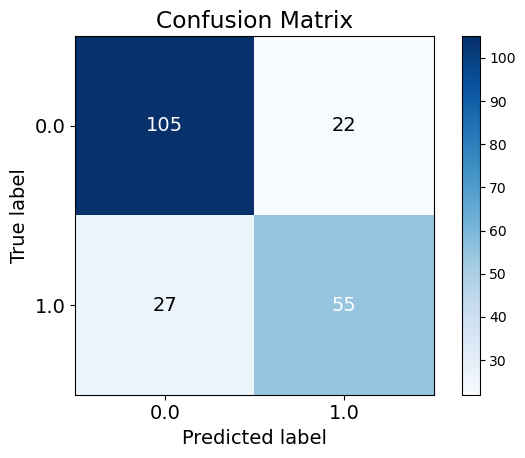

In [70]:
skplt.metrics.plot_confusion_matrix(y_test, soft_voting_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for Ensemble Soft Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_test, soft_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, soft_voting_clf.predict(X_test))))

## bagging and pasting

In [71]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  max_samples=100, n_estimators=500, n_jobs=-1,
                  random_state=42)

## out of bag evaluation

In [72]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print('OOB Score', bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))
print('Train Accuracy', accuracy_score(y_train, bag_clf.predict(X_train)))

OOB Score 0.7432735426008968
Test Accuracy 0.7416267942583732
Train Accuracy 0.820627802690583


In [73]:
skplt.metrics.plot_confusion_matrix(y_test, bag_clf.predict(X_test));
save_fig('Confusion Matrix for Out of bag q3')
print("Accuracy Score {}".format(accuracy_score(y_test, bag_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, bag_clf.predict(X_test))))

Accuracy Score 0.7416267942583732
Classification report: 
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79       127
         1.0       0.69      0.62      0.65        82

    accuracy                           0.74       209
   macro avg       0.73      0.72      0.72       209
weighted avg       0.74      0.74      0.74       209



Accuracy Score 0.820627802690583
Classification report: 
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       446
         1.0       0.87      0.76      0.81       446

    accuracy                           0.82       892
   macro avg       0.83      0.82      0.82       892
weighted avg       0.83      0.82      0.82       892



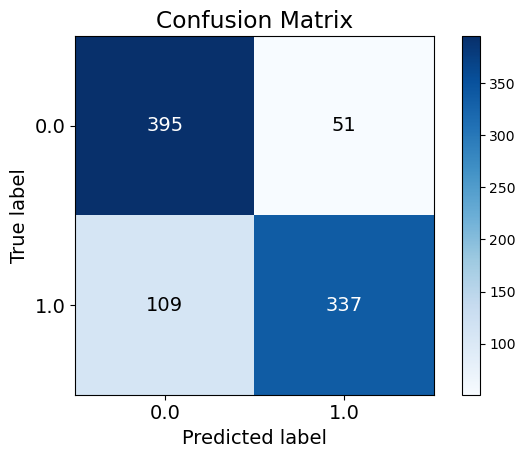

In [74]:
skplt.metrics.plot_confusion_matrix(y_train, bag_clf.predict(X_train));
save_fig('Confusion Matrix train for Out of bag q3')
print("Accuracy Score {}".format(accuracy_score(y_train, bag_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, bag_clf.predict(X_train))))

## impact of no. of estimators

In [75]:
import numpy as np
est = range(50, 500, 50)
train_acc = []
test_acc = []
oob_acc = []
estim = []
out = []
for num_est in est:
    estim.append(num_est)
    rnd_clf = RandomForestClassifier(max_depth=5, n_estimators=num_est, oob_score = True, 
                                     max_leaf_nodes=16, n_jobs=-1, 
                                     random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)
    train_acc.append(
        accuracy_score(y_train, rnd_clf.predict(X_train)))
    test_acc.append(
        accuracy_score(y_test, rnd_clf.predict(X_test)))
    oob_acc.append(rnd_clf.oob_score_)
i = 0
while i < len(estim):
    print('Num of estimators: ', estim[i], ' train acc = ', train_acc[i],
         ' test acc = ', test_acc[i], 'oob = ', oob_acc[i])
    i = i + 1

Num of estimators:  50  train acc =  0.7959641255605381  test acc =  0.722488038277512 oob =  0.695067264573991
Num of estimators:  100  train acc =  0.804932735426009  test acc =  0.7320574162679426 oob =  0.7130044843049327
Num of estimators:  150  train acc =  0.8094170403587444  test acc =  0.7272727272727273 oob =  0.718609865470852
Num of estimators:  200  train acc =  0.8038116591928252  test acc =  0.7320574162679426 oob =  0.7152466367713004
Num of estimators:  250  train acc =  0.8004484304932735  test acc =  0.722488038277512 oob =  0.7130044843049327
Num of estimators:  300  train acc =  0.8015695067264574  test acc =  0.7416267942583732 oob =  0.718609865470852
Num of estimators:  350  train acc =  0.8038116591928252  test acc =  0.7272727272727273 oob =  0.7174887892376681
Num of estimators:  400  train acc =  0.804932735426009  test acc =  0.7177033492822966 oob =  0.7152466367713004
Num of estimators:  450  train acc =  0.8060538116591929  test acc =  0.7177033492822966

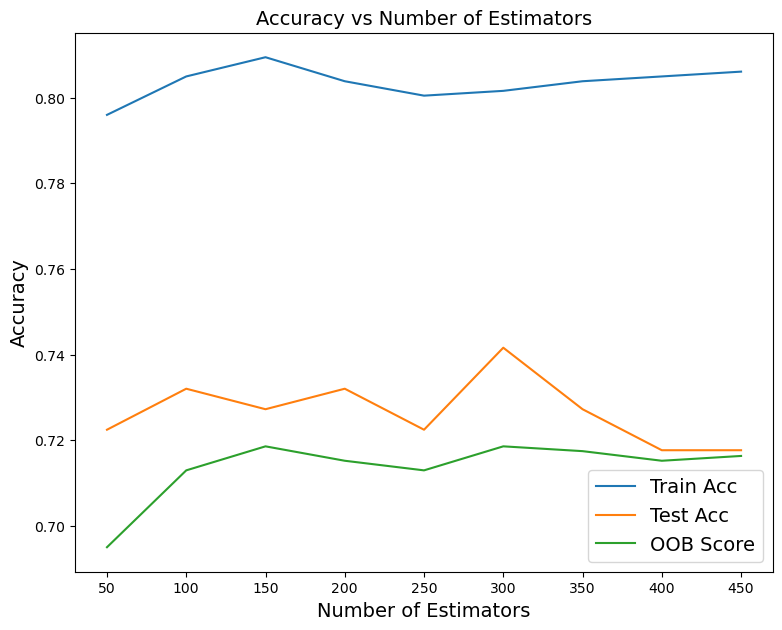

In [76]:
plt.figure(figsize = (9,7))
plt.plot(estim, train_acc, label = 'Train Acc')
plt.plot(estim, test_acc, label = 'Test Acc')
plt.plot(estim, oob_acc, label = 'OOB Score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## ADA boost classifier

In [77]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6650717703349283

### Train Set

In [78]:
skplt.metrics.plot_confusion_matrix(y_train, ada_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for AdaBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_train, ada_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, ada_clf.predict(X_train))))

Accuracy Score 0.7477578475336323
Classification report: 
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75       446
         1.0       0.76      0.73      0.74       446

    accuracy                           0.75       892
   macro avg       0.75      0.75      0.75       892
weighted avg       0.75      0.75      0.75       892



In [79]:
### Test Set

Accuracy Score 0.6650717703349283
Classification report: 
              precision    recall  f1-score   support

         0.0       0.76      0.65      0.70       127
         1.0       0.56      0.68      0.62        82

    accuracy                           0.67       209
   macro avg       0.66      0.67      0.66       209
weighted avg       0.68      0.67      0.67       209



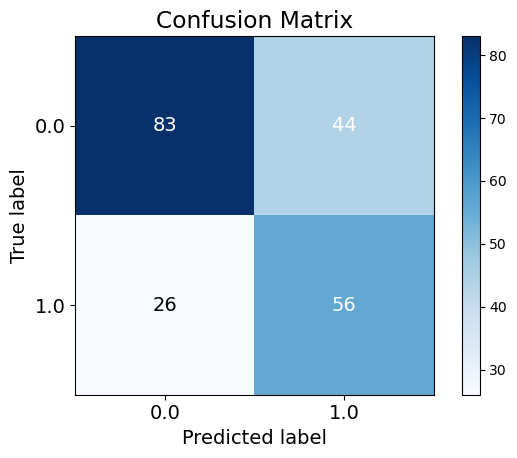

In [80]:
skplt.metrics.plot_confusion_matrix(y_test, ada_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for AdaBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_test, ada_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, ada_clf.predict(X_test))))

In [81]:
import numpy as np
est = np.linspace(1, 500, 2)
train_acc = []
test_acc = []
num_learners = []
for estimators in est:
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=int(estimators),
    learning_rate=0.5, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_test = ada_clf.predict(X_test)
    y_pred_train = ada_clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    num_learners.append(estimators)

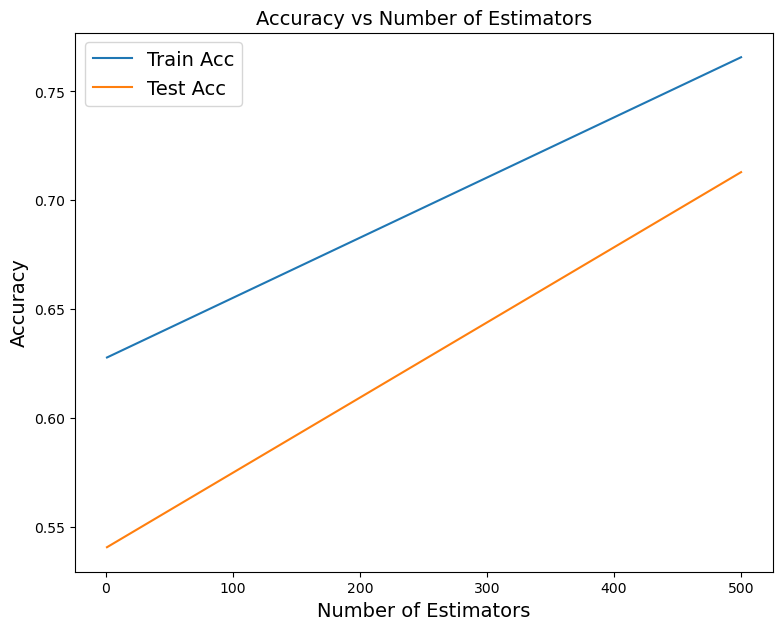

In [82]:
plt.figure(figsize = (9,7))
plt.plot(num_learners, train_acc, label = 'Train Acc')
plt.plot(num_learners, test_acc, label = 'Test Acc')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## XGBoost

In [83]:
import xgboost as xgb

In [84]:
X_test.columns

Index(['sex_M', 'famsize_GT3', 'Pstatus_A', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_yes',
       'Medu', 'Fedu', 'famrel', 'schoolsup_yes', 'paid_yes', 'activities_yes',
       'higher_yes', 'romantic_yes', 'studytime', 'failures', 'freetime',
       'goout', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [85]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.8133971291866029

### Train Set

In [86]:
skplt.metrics.plot_confusion_matrix(y_train, xgb_cl.predict(X_train));
save_fig('Train Set Confusion Matrix for XGBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_train, xgb_cl.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, xgb_cl.predict(X_train))))

Accuracy Score 1.0
Classification report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       446
         1.0       1.00      1.00      1.00       446

    accuracy                           1.00       892
   macro avg       1.00      1.00      1.00       892
weighted avg       1.00      1.00      1.00       892



### Test Set

Accuracy Score 0.8133971291866029
Classification report: 
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       127
         1.0       0.75      0.78      0.77        82

    accuracy                           0.81       209
   macro avg       0.80      0.81      0.81       209
weighted avg       0.81      0.81      0.81       209



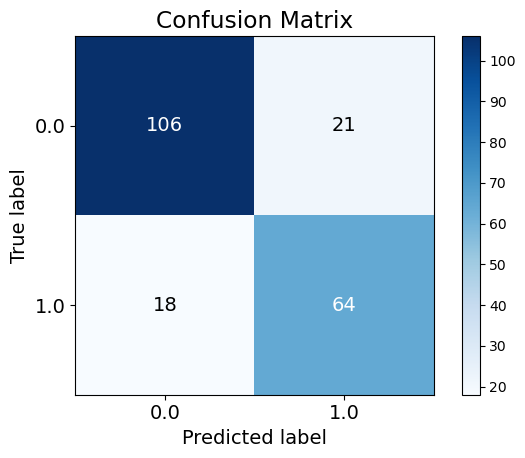

In [87]:
skplt.metrics.plot_confusion_matrix(y_test, xgb_cl.predict(X_test));
save_fig('Test Set Confusion Matrix for XGBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_test, xgb_cl.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, xgb_cl.predict(X_test))))

## XAI using LIME

In [88]:
#conda install -c conda-forge ds-lime

In [89]:
from lime.lime_tabular import LimeTabularExplainer

In [90]:
feature_names = X_train.columns.tolist()
#X_train.columns.values.tolist()

In [91]:
# Create a LimeTabularExplainer object
explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['low', 'high'])


In [92]:
# Select a specific instance from the testing set for explanation
instance_idx = 0
instance = X_test.values[instance_idx]
true_label = y_test[instance_idx]

In [93]:
# Generate explanations using LIME
#Since our accuracy is the highest for Out of Bag, we will be using OOB to interpret
explanation_lime = explainer.explain_instance(instance, best_grid_rf.predict_proba, num_features=len(feature_names))


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.27688e-29): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [94]:
# Print the true label and predicted probabilities
print("True Label:", true_label)
print("Predicted Probabilities:", best_grid_rf.predict_proba([instance]))



True Label: 1.0
Predicted Probabilities: [[0.69010679 0.30989321]]


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [95]:
# Print the top features and their weights in the LIME explanation
print("LIME Explanation:")
for feature, weight in explanation_lime.as_list():
    print(feature, weight)

LIME Explanation:
goout <= 0.25 -0.24775333619120685
sex_M <= 0.00 -0.17445069828617302
famrel <= 0.66 0.10219124326914143
Fjob_health <= 0.00 0.052907934395764314
Fjob_teacher <= 0.00 0.038445931618642015
0.00 < Fjob_services <= 1.00 0.025117188333434244
paid_yes > 0.00 0.023356662233282106
studytime > 0.33 -0.020695723663932845
Mjob_services > 0.00 0.020539905447133088
0.50 < G3 <= 0.55 0.01952863642055403
0.00 < famsup_yes <= 1.00 -0.01521474274317469
0.00 < guardian_mother <= 1.00 -0.01340830246217624
schoolsup_yes <= 0.00 0.013233808470321306
Pstatus_A <= 0.00 0.012558716479046222
famsize_GT3 <= 0.00 0.012469719085791139
0.00 < activities_yes <= 1.00 -0.012070546862857466
0.47 < G1 <= 0.58 0.011334592567429332
0.04 < absences <= 0.11 0.011097633536731745
guardian_father <= 0.00 -0.010930180780428614
Mjob_teacher <= 0.00 -0.00838138120958893
Mjob_at_home <= 0.00 0.007118999057134746
Fjob_other <= 0.00 -0.007022434937415793
0.47 < G2 <= 0.58 0.007002414600312468
Mjob_health <= 0.00 

### Feature Importance Plot

In [96]:
feature_importance = explanation_lime.as_list()


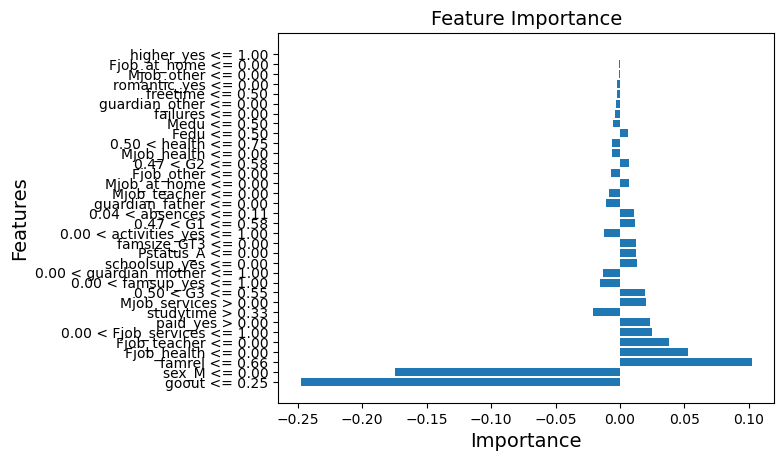

In [97]:
import matplotlib.pyplot as plt

features, values = zip(*feature_importance)
plt.barh(features, values)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.savefig('images/question 3/LIME Feature Importance q3.png')
plt.show()

### LIME Explanation Plot

In [98]:
feature_contributions = explanation_lime.local_exp[1]

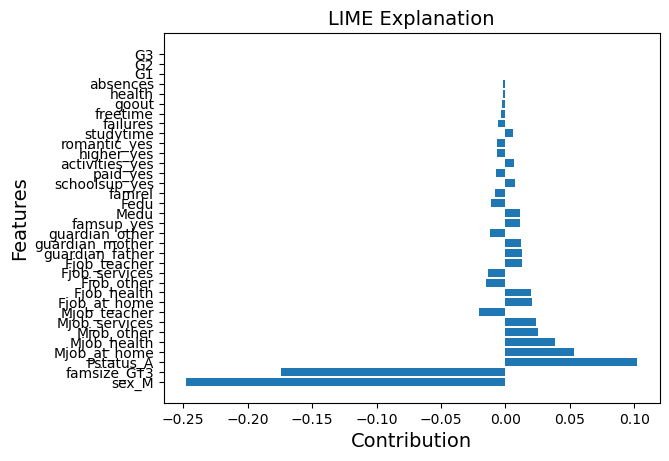

In [99]:
import matplotlib.pyplot as plt

features, contributions = zip(*feature_contributions)
plt.barh(feature_names, contributions)
plt.xlabel('Contribution')
plt.ylabel('Features')
plt.title('LIME Explanation')
plt.savefig('images/question 3/LIME Explanation Graph q3.png')
plt.show()

## Explanation for class 1

In [100]:
import matplotlib.pyplot as plt
print('Predicted: ',best_grid_rf.predict(X_test)[0])
print('Actual: ', y_test[0])
explanation_lime.show_in_notebook(show_table=True, show_all=False)
explanation_lime.save_to_file('images/question 3/LIME Prediction Probability for class 1 q3.html')

Predicted:  0.0
Actual:  1.0


### Explanation for class 0

In [101]:
#Perform the explanation on the 8th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[8], best_grid_rf.predict_proba)

# show the result of the model's explaination
print('Predicted: ',best_grid_rf.predict(X_test)[8])
print('Actual: ', y_test[8])
explaination.show_in_notebook(show_table = True, show_all = False,)
explaination.save_to_file('images/question 3/LIME Prediction Probability for class 0 q3.html')


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted:  0.0
Actual:  0.0


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.41268e-29): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [102]:
pd.DataFrame({'y_test': y_test, 'y_pred': best_grid_rf.predict(X_test)}).head(10)

y_test  y_pred
0     1.0     0.0
1     1.0     1.0
2     1.0     1.0
3     1.0     1.0
4     0.0     0.0
5     0.0     1.0
6     0.0     0.0
7     1.0     1.0
8     0.0     0.0
9     0.0     0.0

# SHAP

In [103]:
import shap
import matplotlib.pyplot as plt

#model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500, n_jobs=-1, oob_score=True, random_state=42)
#model.fit(X_train,y_train)

# Create a SHAP explainer
#explainer = shap.KernelExplainer(model.predict_proba,X_train)  # Replace "model" with your trained model
explainer = shap.Explainer(best_grid_rf)

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(X_train)  # Replace "X" with your input data

# Select the desired instance for explanation (index 0 in this example)
instance = X_train.iloc[0]  # Replace "X" with your input data

# Calculate the SHAP values for the selected instance
shap_values_instance = explainer.shap_values(instance)

# Plot the SHAP summary plot
#shap.summary_plot(shap_values, X_train)  # Replace "X" with your input data

# Plot the SHAP values for the selected instance
#shap.force_plot(explainer.expected_value, shap_values[0])

# Save the figures
#plt.savefig('images/shap_summary_plot.png', dpi=300)
#shap.save_html('images/shap_force_plot.html', shap.force_plot(explainer.expected_value, shap_values_instance, instance))

# Show the plots
#plt.show()


In [104]:
from shap.plots import beeswarm
beeswarm(explainer(X_train)[:,:,1],max_display=20)
plt.savefig('images/question 3/beeswarm_plot.png',dpi=300, bbox_inches= 'tight')

<Figure size 640x480 with 0 Axes>

In [105]:
pd.concat([X_test.loc[[190]],y_test.loc[[190]]], axis=1)

sex_M  famsize_GT3  Pstatus_A  Mjob_at_home  Mjob_health  Mjob_other  \
190    0.0          1.0        0.0           0.0          0.0         1.0   

     Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  ...  studytime  \
190            0.0           0.0           0.0          0.0  ...   0.333333   

     failures  freetime  goout  health  absences        G1        G2    G3  \
190       0.0       0.5   0.75     1.0  0.035714  0.684211  0.578947  0.55   

     alc  
190  1.0  

[1 rows x 35 columns]

In [106]:
# Calculate Shap values
choosen_instance = X_test.loc[[190]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, gamma=scale, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END b

[CV] END break_ties=True, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=True, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=True, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.4s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.4s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.4s
[CV] END break_ties=True, gamma=scale, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END br

[CV] END .........penalty=l2, random_state=None, solver=saga; total time=   0.0s
[CV] END ..penalty=None, random_state=None, solver=liblinear; total time=   0.0s
[CV] END ..penalty=None, random_state=None, solver=liblinear; total time=   0.0s
[CV] END ..penalty=None, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END penalty=None, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=None, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END penalty=None, random_state=None, solver=newton-cholesky; total time=   0.0s
[CV] END ........penalty=None, random_state=None, solver=sag; total time=   0.0s
[CV] END ........penalty=None, random_state=None, solver=sag; total time=   0.0s
[CV] END ........penalty=None, random_state=None, solver=sag; total time=   0.0s
[CV] END break_ties=True, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, gamma=scale, kernel=linear, 

[CV] END break_ties=True, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.4s
[CV] END break_ties=True, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.4s
[CV] END break_ties=True, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.4s
[CV] END break_ties

[CV] END break_ties=True, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=True, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=True, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   